# One-vs-All Classification with Neural Network

Week4のMulti-class Classificationの課題について

In [1]:
import math, random
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

default_figsize = plt.rcParams['figure.figsize']

## Dataset

In [2]:
dataset = scipy.io.loadmat('ex3data1.mat')
X = dataset['X']
y = np.array([0 if y == 10 else y for y in dataset['y']]).reshape(-1, 1)

X.shape, y.shape

((5000, 400), (5000, 1))

## Model representation

In [3]:
weights = scipy.io.loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']

theta1.shape, theta2.shape

((25, 401), (10, 26))

## Feedforward Propagation and Prediction

In [4]:
%run 'nn_classifier.py'

In [5]:
preds = predict(theta1, theta2, X)
pred_classes = np.array([p['class'] for p in preds]).reshape(-1, 1)
compute_train_accuracy(pred_classes, y)

97.519999999999996

## Visualize prediction mistakes

In [6]:
def display_data(images, labels):
    m = len(labels)
    rows = math.floor(math.sqrt(m))
    columns = math.ceil(m / rows)

    fig = plt.figure()
    fig.subplots_adjust(hspace=0.7)

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            ax = fig.add_subplot(rows, columns, index+1)
            ax.axis('off')
            ax.set_title(labels[index])
            ax.imshow(np.array(images[index]).reshape(20,20).T,
                      cmap=plt.get_cmap('gray'))

In [7]:
corrects = (np.where(pred_classes.ravel() == y.ravel()))[0]
mistakes = (np.where(pred_classes.ravel() != y.ravel()))[0]

saved assets/week04_nn_mistakes.png


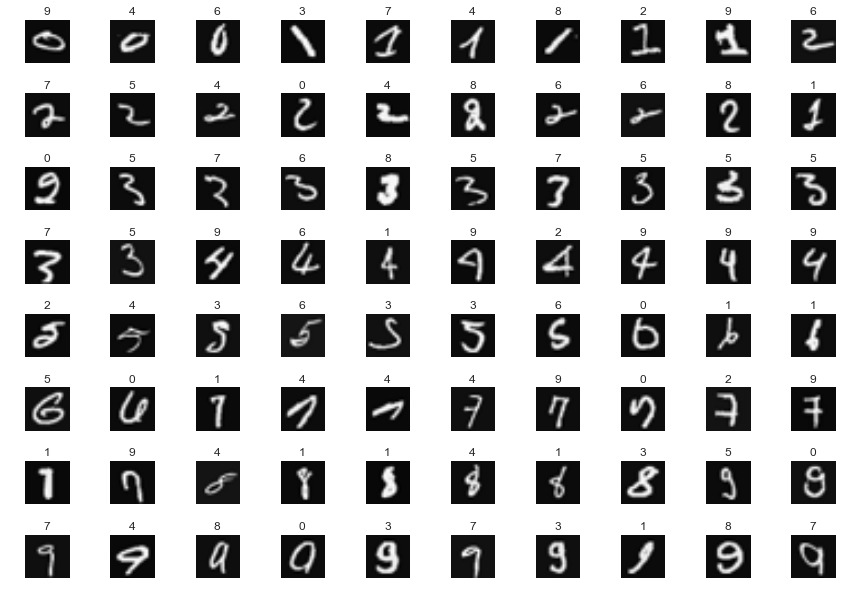

In [8]:
ixs = sorted(np.random.permutation(mistakes)[0:80])
images = X[np.ix_(ixs)].tolist()
labels = pred_classes[ixs].ravel().tolist()

plt.rcParams['figure.figsize'] = (15, 10)
display_data(images, labels)
savefig('week04_nn_mistakes.png')

saved assets/week04_nn_pred_hist.png


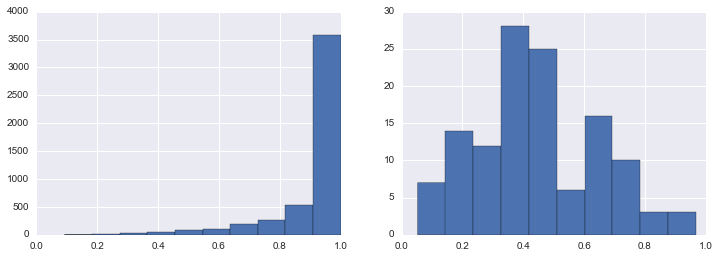

In [9]:
df = pd.DataFrame(data=preds)

plt.rcParams['figure.figsize'] = (12, 4)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(df.ix[corrects].value)
ax = fig.add_subplot(1,2,2)
ax.hist(df.ix[mistakes].value)
savefig('week04_nn_pred_hist.png')